# **Task - 02 Supervised Machine Learning**
## **By SAURAV BORAH**
**This task is based on Predicting the score of a student based on His/Her no.of Learning Hours.**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Importing Data from te given Dataset URL**

In [2]:
# Reading data from remote link
link='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#describing the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#checking different entries and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#counting the number of null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# EXPLORATORY DATA ANALYSIS

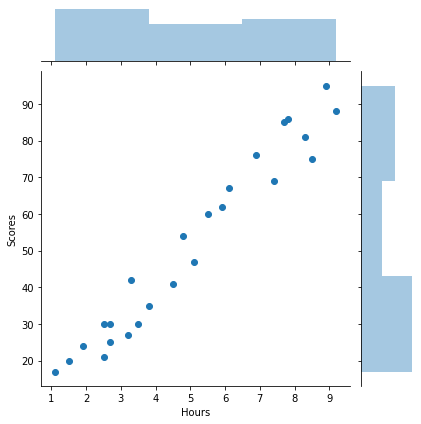

In [6]:
# 2-D Plotting the distribution of scores
sns.jointplot(x='Hours',y='Scores',data=df)

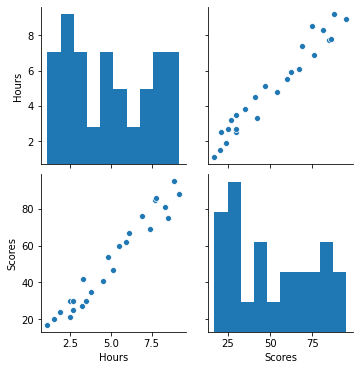

In [7]:
sns.pairplot(df)

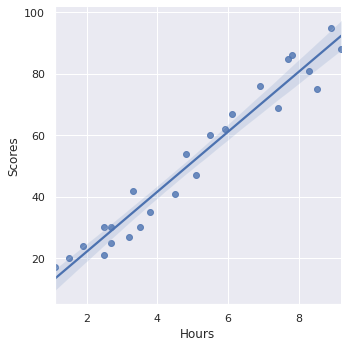

In [8]:
sns.set(color_codes=True)
sns.lmplot(x='Hours',y='Scores',data=df)

# **Training and Testing**

In [9]:
# dividing the data into "attributes" (inputs) and "labels" (outputs).
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [10]:
#importing train test split
from sklearn.model_selection import train_test_split

In [11]:
# split this data into training and test sets.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# **Training the data**

In [12]:
#importing linear regression
from sklearn.linear_model import  LinearRegression

In [13]:
lm=LinearRegression()

In [14]:
#fitting the model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#printing the coefficients
print(lm.coef_)

[9.91065648]


In [16]:
#printing the intercept
print(lm.intercept_)

2.018160041434662


# Predicting the Test Data

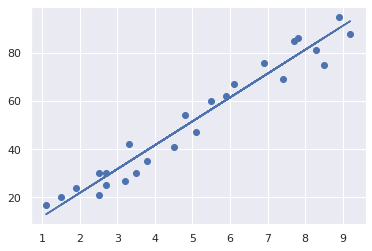

In [17]:
line =lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [18]:
#printing the test dataset
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
# predicting the values
y_pred=lm.predict(X_test)

Comparing Actual values with the Predicted Values

In [20]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Evaluating The Model**

In [21]:
import sklearn.metrics as metrics

In [22]:
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 4.183859899002982
MSE: 21.598769307217456
RMSE: 4.647447612100373


# **Predicting the Score based on the number of hours provided by the user**

In [23]:
hours=float(input())
Score=(lm.coef_*hours)+lm.intercept_
print(Score)

9.25
[93.69173249]
